<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/Heart_stroke_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import seaborn as sns

In [2]:
from pandas import read_csv
from sklearn.neighbors import *

In [3]:
from google.colab import files
uploaded=files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [5]:
df=read_csv('healthcare-dataset-stroke-data.csv')

In [6]:
df1=df.copy()
df2=df.copy()

In [7]:
display(df1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df1.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [10]:
df1.shape

(5110, 12)

In [11]:
df1.iloc[4500:4570]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4500,13598,Male,60.0,0,0,Yes,Self-employed,Urban,227.23,40.0,formerly smoked,0
4501,24246,Male,7.0,0,0,No,children,Urban,77.76,18.1,Unknown,0
4502,29276,Male,3.0,0,0,No,children,Urban,72.76,18.8,Unknown,0
4503,20979,Female,39.0,0,0,No,Private,Rural,90.11,23.6,never smoked,0
4504,46048,Male,60.0,0,0,Yes,Govt_job,Rural,203.27,29.7,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4565,52960,Female,56.0,0,0,Yes,Self-employed,Urban,98.14,32.7,formerly smoked,0
4566,56600,Female,43.0,0,0,Yes,Private,Rural,84.04,30.6,Unknown,0
4567,9394,Male,11.0,0,0,No,children,Rural,92.24,27.9,Unknown,0
4568,42400,Female,2.0,0,0,No,children,Urban,94.92,20.4,Unknown,0


In [12]:
df1.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [13]:
df1=df1.dropna()
df2=df2.dropna()

In [15]:
df1=df1.drop(columns=['id'])

In [16]:
df2=df2.drop(columns=['id'])

In [14]:
df1.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


#Label encoder


In [20]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

In [21]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


#EDA diagram

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
sns.set(style="whitegrid")

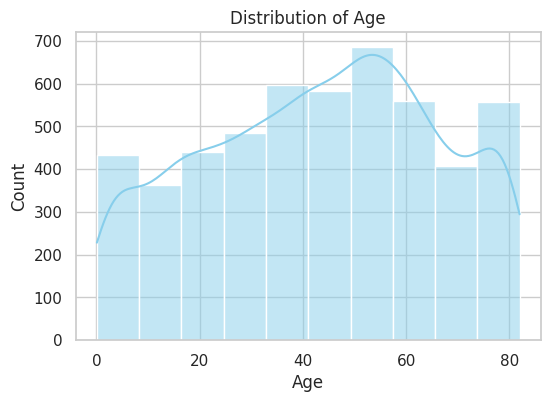

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

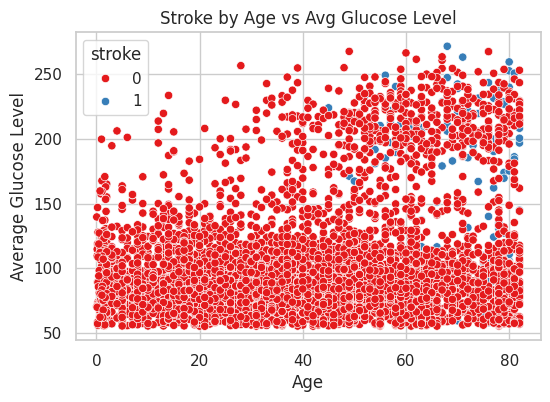

In [25]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', palette='Set1')
plt.title('Stroke by Age vs Avg Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()


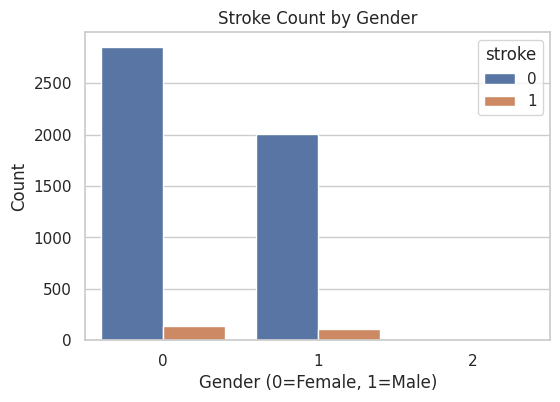

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='stroke')
plt.title('Stroke Count by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')
plt.show()

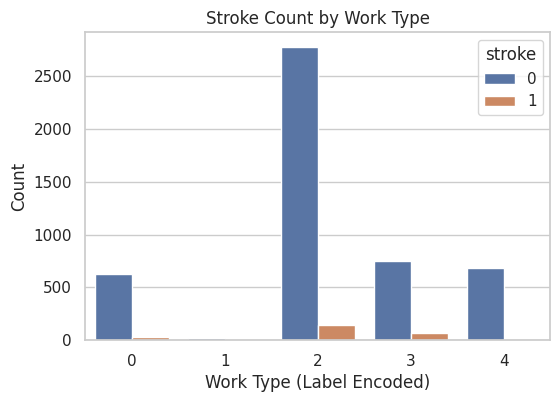

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title('Stroke Count by Work Type')
plt.xlabel('Work Type (Label Encoded)')
plt.ylabel('Count')
plt.show()

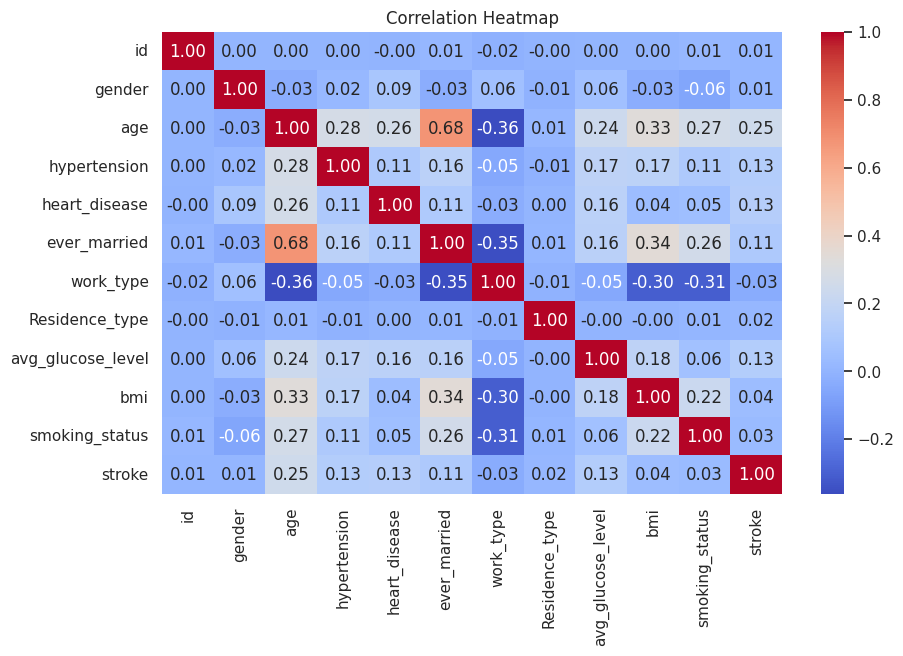

In [28]:
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

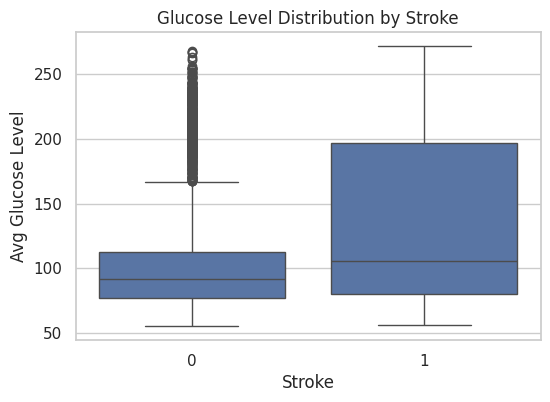

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')
plt.title('Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Avg Glucose Level')
plt.show()

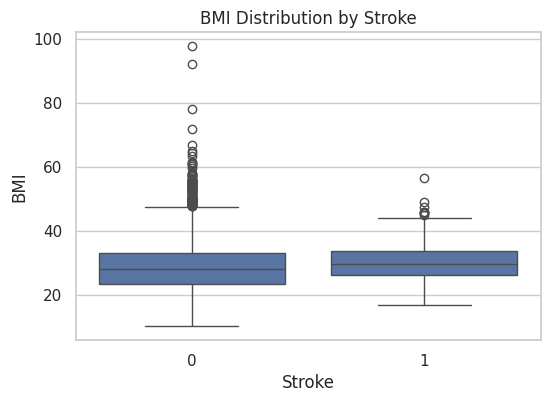

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='stroke', y='bmi')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

/tmp/ipython-input-31-509372083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='stroke', y='age', inner='quartile', palette='muted')


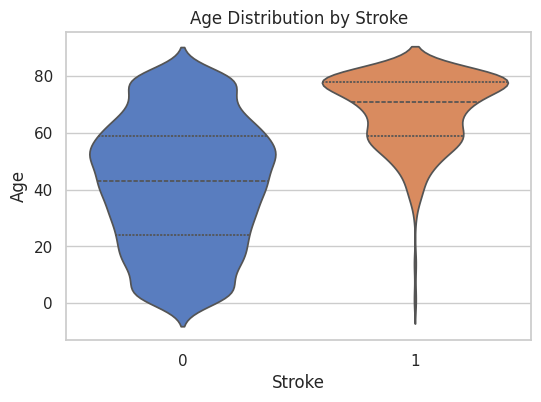

In [31]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='stroke', y='age', inner='quartile', palette='muted')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

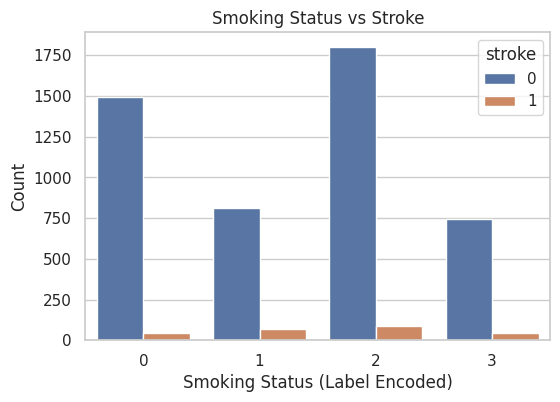

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Smoking Status vs Stroke')
plt.xlabel('Smoking Status (Label Encoded)')
plt.ylabel('Count')
plt.show()

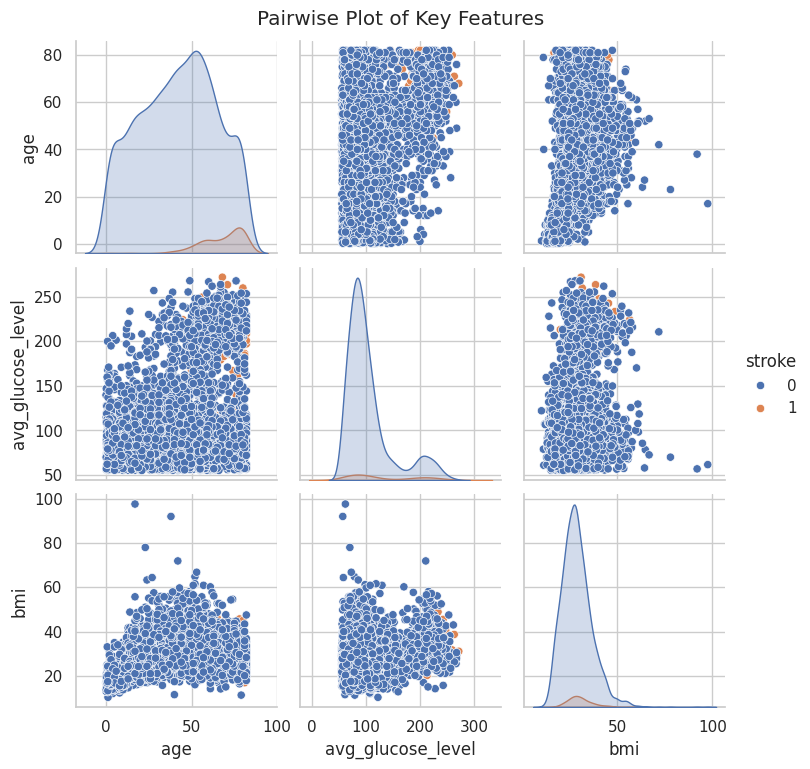

In [33]:
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', diag_kind='kde')
plt.suptitle('Pairwise Plot of Key Features', y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.9% of the points cannot be plac

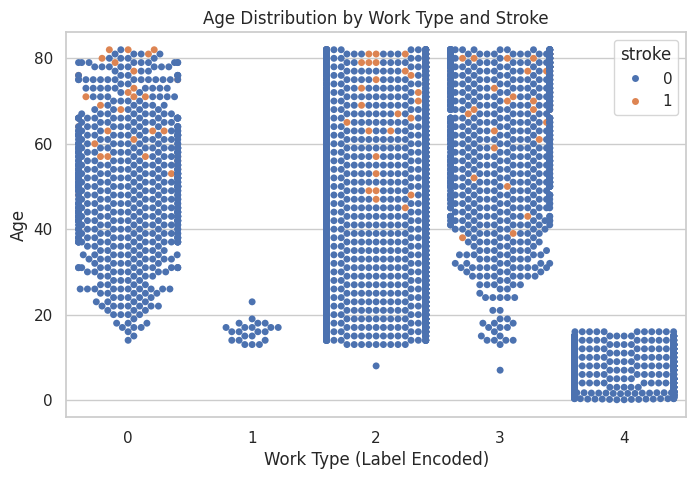

In [34]:
plt.figure(figsize=(8, 5))
sns.swarmplot(data=df, x='work_type', y='age', hue='stroke')
plt.title('Age Distribution by Work Type and Stroke')
plt.xlabel('Work Type (Label Encoded)')
plt.ylabel('Age')
plt.show()


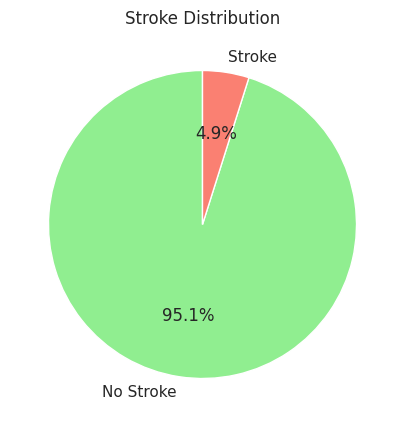

In [35]:
stroke_counts = df['stroke'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Stroke Distribution')
plt.show()

In [37]:
df['stroke'].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


In [45]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


X = df1.drop(['bmi'], axis=1)
y = df1['bmi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


# Step 5: Evaluation (for regression metrics)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MSE: 57.26264337017971
MAE: 5.513352619967065
R2 Score: 0.16332311564596036


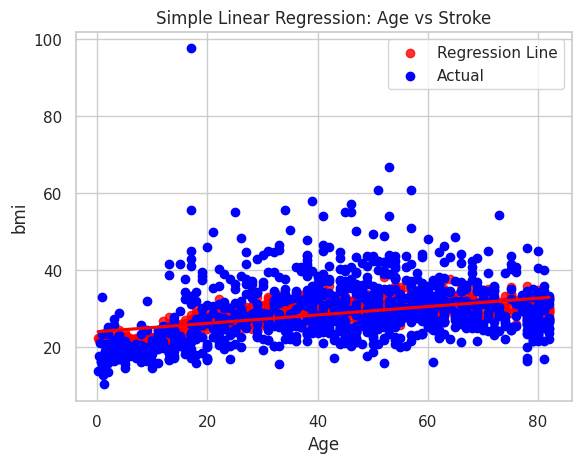

In [53]:
import seaborn as sns

# Example with one feature 'age'
sns.regplot(x=X_test['age'], y=y_pred_lr, color='red', label='Regression Line')
plt.scatter(X_test['age'], y_test, color='blue', label='Actual')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.title('Simple Linear Regression: Age vs Stroke')
plt.legend()
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.9389002036659878
Confusion Matrix (KNN):
 [[922   7]
 [ 53   0]]


In [54]:
y_test.shape

(982,)